<a href="https://colab.research.google.com/github/Ailar-Taghavi/Big-data-project/blob/main/project_modeling_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim of the Project
The aim of this project is to develop a reliable data analytics strategy to assist a bank in making informed loan approval decisions. By leveraging machine learning techniques, specifically Decision Tree and Naive Bayes classifiers, the project aims to predict the credit risk of potential customers based on historical data. This predictive modeling will help the bank minimize the risk of default by accurately identifying customers with good and bad credit risks.

# Summary of Dataset
The dataset used in this project is the German Credit Data dataset, which consists of 1000 entries and 21 attributes. The attributes include various financial and personal characteristics of customers, such as account balance, credit amount, duration of credit, payment status of previous credit, purpose of the loan, and more. The class attribute, 'Creditability', is a binary variable indicating whether the customer's credit rating is good (1) or bad (0). The dataset provides a comprehensive set of features that can be utilized to build effective predictive models for credit risk assessment.

# Tools and Machine Learning Methods in Python:
To achieve the aim of this project, the following tools and machine learning methods were employed using Python:

1. Pandas: Used for data manipulation and analysis. It provides data
structures like DataFrames to handle tabular data effectively.
2. NumPy: Utilized for numerical operations and array manipulations, which are fundamental for data preprocessing.
3. Scikit-learn: A machine learning library in Python that offers various tools for data mining and data analysis. The specific methods  used include:
- DecisionTreeClassifier: For building and training the Decision Tree model.
- GaussianNB: For building and training the Naive Bayes model.
- Train_test_split: To split the dataset into training and test sets.
- StandardScaler: To standardize the features by removing the mean and scaling to unit variance.
- Accuracy_score, classification_report, confusion_matrix: For evaluating the performance of the models.
- Roc_curve, auc: For computing and plotting the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric.
4. Matplotlib and Seaborn: Libraries for creating visualizations to better

understand the data distributions, model performance metrics, and comparison of results.


These tools and methods collectively enable the development, training, evaluation, and visualization of the predictive models, thereby facilitating a comprehensive analysis of the credit risk prediction problem.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Prepare the Data

In [ ]:
# Load the dataset
data = pd.read_csv('/content/german_credit.csv')

# Separate features and target variable
X = data.drop('Creditability', axis=1)
y = data['Creditability']

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display dataset info
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

# Train and Evaluate Decision Tree Classifier

In [ ]:
# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report_dt)
print("Confusion Matrix:\n", confusion_matrix_dt)



Decision Tree Classifier
Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.68      0.60        62
           1       0.84      0.75      0.79       138

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.75      0.72      0.73       200

Confusion Matrix:
 [[ 42  20]
 [ 35 103]]


# Train and Evaluate Naive Bayes Classifier

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Classifier")
print("Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)


Naive Bayes Classifier
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63        62
           1       0.84      0.80      0.82       138

    accuracy                           0.76       200
   macro avg       0.72      0.73      0.73       200
weighted avg       0.77      0.76      0.76       200

Confusion Matrix:
 [[ 41  21]
 [ 27 111]]


# Visualize Confusion Matrices

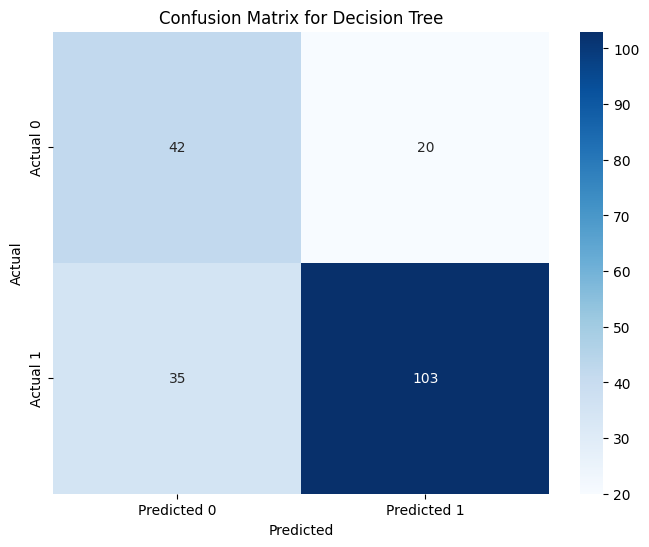

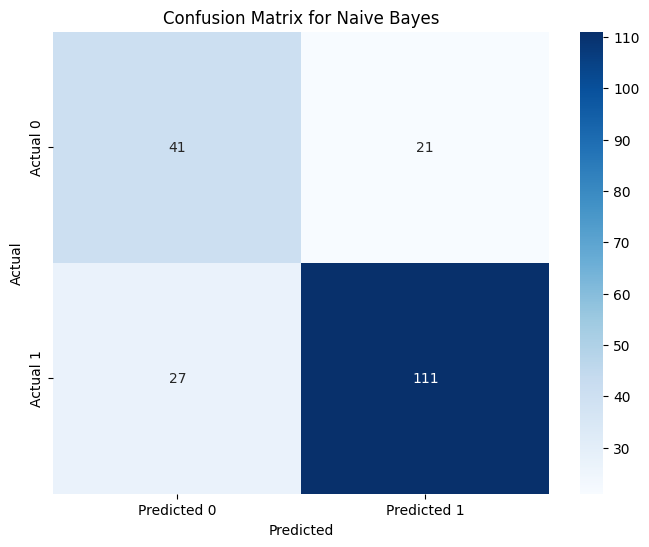

In [ ]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(confusion_matrix_dt, "Decision Tree")
plot_confusion_matrix(confusion_matrix_nb, "Naive Bayes")


# Visualize Performance Metrics

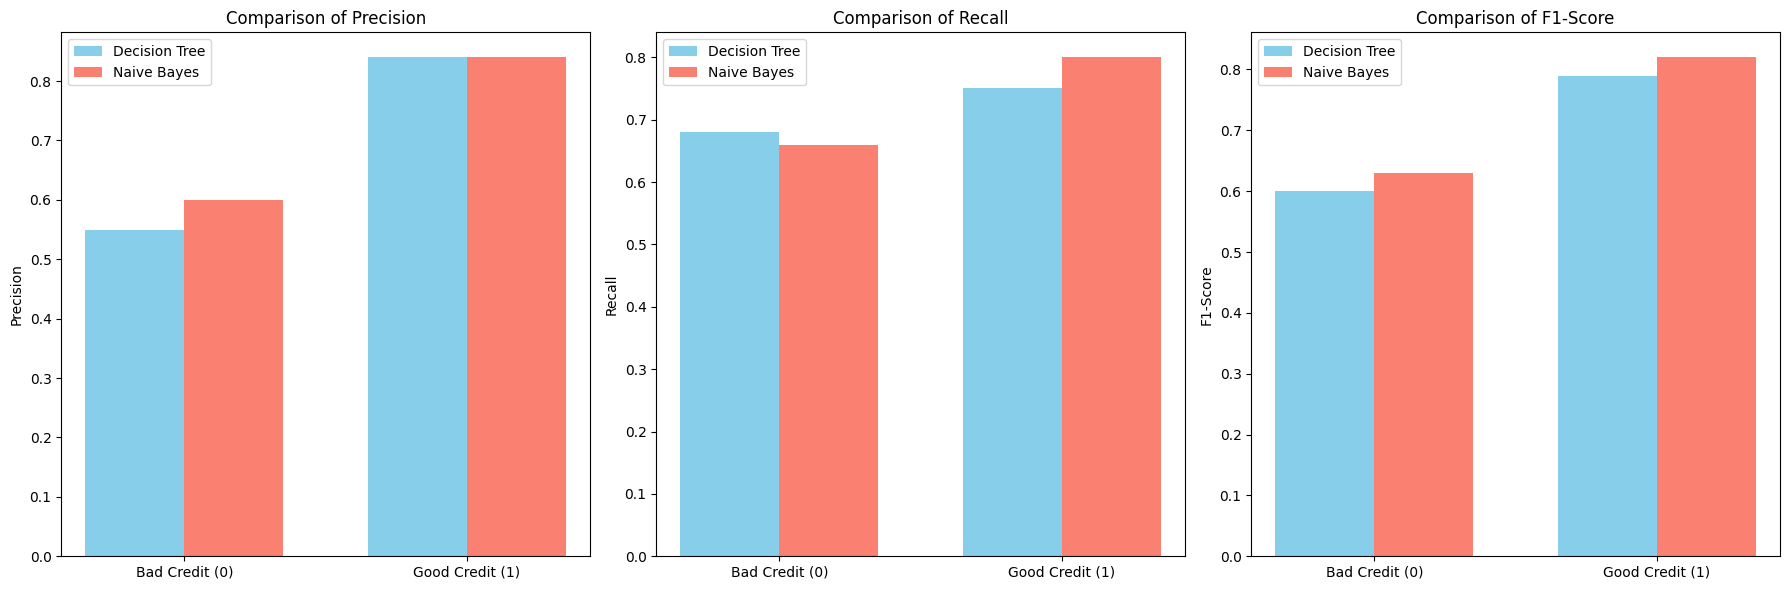

In [ ]:
def extract_metrics(report):
    lines = report.split('\n')
    metrics = []
    for line in lines[2:4]:
        values = line.split()
        metrics.append([float(values[1]), float(values[2]), float(values[3])])
    return np.array(metrics)

metrics_dt = extract_metrics(classification_report_dt)
metrics_nb = extract_metrics(classification_report_nb)

labels = ['Bad Credit (0)', 'Good Credit (1)']
metric_names = ['Precision', 'Recall', 'F1-Score']

x = np.arange(len(labels))
width = 0.35

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metric_names):
    axes[i].bar(x - width/2, metrics_dt[:, i], width, label='Decision Tree', color='skyblue')
    axes[i].bar(x + width/2, metrics_nb[:, i], width, label='Naive Bayes', color='salmon')
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(labels)
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()



# Plot ROC Curves

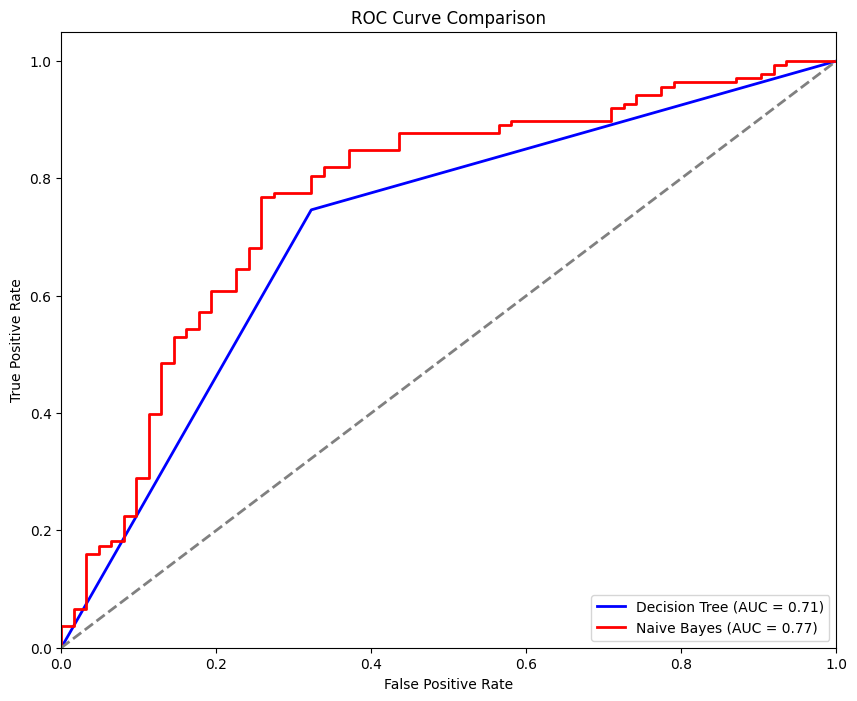

In [ ]:
# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
